In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
application_df= pd.read_csv("Dataset/application_record.csv")
credit_record = pd.read_csv("Dataset/credit_record.csv")
pd.options.display.float_format = '{:.2f}'.format

print(application_df.shape,credit_record.shape)

(438557, 18) (1048575, 3)


In [3]:
application_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.00,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.00,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.00,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.00,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [7]:
application_df.isnull().sum()/application_df.shape[0]*100

ID                     0.00
CODE_GENDER            0.00
FLAG_OWN_CAR           0.00
FLAG_OWN_REALTY        0.00
CNT_CHILDREN           0.00
AMT_INCOME_TOTAL       0.00
NAME_INCOME_TYPE       0.00
NAME_EDUCATION_TYPE    0.00
NAME_FAMILY_STATUS     0.00
NAME_HOUSING_TYPE      0.00
DAYS_BIRTH             0.00
DAYS_EMPLOYED          0.00
FLAG_MOBIL             0.00
FLAG_WORK_PHONE        0.00
FLAG_PHONE             0.00
FLAG_EMAIL             0.00
OCCUPATION_TYPE       30.60
CNT_FAM_MEMBERS        0.00
dtype: float64

In [8]:
credit_record.isnull().sum()/application_df.shape[0]*100

ID               0.00
MONTHS_BALANCE   0.00
STATUS           0.00
dtype: float64

In [9]:
# Defining Good & Bad Debt and replacing the values in 'STATUS' column.
status_dict = {'C' : 'Good_Debt',
               'X' : 'Good_Debt',
               '0' : 'Good_Debt',
               '1' : 'Good_Debt',
               '2' : 'Bad_Debt',
               '3' : 'Bad_Debt',
               '4' : 'Bad_Debt',
               '5' : 'Bad_Debt'}
credit_record.replace({'STATUS' : status_dict}, inplace=True)
credit_record = credit_record.value_counts(subset=['ID','STATUS']).unstack(fill_value=0)
credit_record

STATUS,Bad_Debt,Good_Debt
ID,,
5001711,0,4
5001712,0,19
5001713,0,22
5001714,0,15
5001715,0,60
...,...,...
5150482,0,18
5150483,0,18
5150484,0,13


In [10]:
# Approval for credit card on the basis of good & bad debt
credit_record.loc[(credit_record['Good_Debt'] > credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 1
credit_record.loc[(credit_record['Good_Debt'] <= credit_record['Bad_Debt']), 'CREDIT_APPROVAL_STATUS'] = 0

credit_record['MONTHS_IN_BOOKS'] = credit_record['Good_Debt'] + credit_record['Bad_Debt']

credit_record.drop(['Bad_Debt', 'Good_Debt'], axis=1, inplace=True)

credit_record

STATUS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
ID,,
5001711,1.00,4
5001712,1.00,19
5001713,1.00,22
5001714,1.00,15
5001715,1.00,60
...,...,...
5150482,1.00,18
5150483,1.00,18
5150484,1.00,13


In [11]:
credit_record['CREDIT_APPROVAL_STATUS'].value_counts()

1.00    45931
0.00       54
Name: CREDIT_APPROVAL_STATUS, dtype: int64

In [12]:
comp_dataset = application_df.reset_index().merge(credit_record, on='ID').set_index('index')
comp_dataset

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
index,,,,,,,,,,,,,,,,,,,,
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1.00,16
1,5008805,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,1.00,15
2,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,1.00,30
3,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1.00,5
4,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1,1.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.00,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2,1.00,12
434809,5149834,F,N,Y,0,157500.00,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,1.00,24
434810,5149838,F,N,Y,0,157500.00,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2,1.00,33


In [13]:
# Converting -ve values to +ve values
comp_dataset['DAYS_BIRTH'] = np.where(comp_dataset['DAYS_BIRTH']<0,comp_dataset['DAYS_BIRTH']*(-1),0)
comp_dataset['DAYS_EMPLOYED'] = np.where(comp_dataset['DAYS_EMPLOYED']<0,comp_dataset['DAYS_EMPLOYED']*(-1),0)

# Converting 'DAYS_BIRTH' &  'DAYS_EMPLOYED' into proper years format
comp_dataset['DAYS_BIRTH'] = comp_dataset['DAYS_BIRTH'].apply(lambda x: np.around(x/365))
comp_dataset['DAYS_EMPLOYED'] = comp_dataset['DAYS_EMPLOYED'].apply(lambda x: np.around(x/365))

comp_dataset

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
index,,,,,,,,,,,,,,,,,,,,
0,5008804,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,33.00,12.00,1,1,0,0,NaN,2,1.00,16
1,5008805,M,Y,Y,0,427500.00,Working,Higher education,Civil marriage,Rented apartment,33.00,12.00,1,1,0,0,NaN,2,1.00,15
2,5008806,M,Y,Y,0,112500.00,Working,Secondary / secondary special,Married,House / apartment,59.00,3.00,1,0,0,0,Security staff,2,1.00,30
3,5008808,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.00,8.00,1,0,1,1,Sales staff,1,1.00,5
4,5008809,F,N,Y,0,270000.00,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.00,8.00,1,0,1,1,Sales staff,1,1.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.00,Working,Secondary / secondary special,Married,House / apartment,48.00,7.00,1,0,0,0,Managers,2,1.00,12
434809,5149834,F,N,Y,0,157500.00,Commercial associate,Higher education,Married,House / apartment,34.00,4.00,1,0,1,1,Medicine staff,2,1.00,24
434810,5149838,F,N,Y,0,157500.00,Pensioner,Higher education,Married,House / apartment,34.00,4.00,1,0,1,1,Medicine staff,2,1.00,33


In [14]:
comp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36456 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      36456 non-null  int64  
 1   CODE_GENDER             36456 non-null  object 
 2   FLAG_OWN_CAR            36456 non-null  object 
 3   FLAG_OWN_REALTY         36456 non-null  object 
 4   CNT_CHILDREN            36456 non-null  int64  
 5   AMT_INCOME_TOTAL        36456 non-null  float64
 6   NAME_INCOME_TYPE        36456 non-null  object 
 7   NAME_EDUCATION_TYPE     36456 non-null  object 
 8   NAME_FAMILY_STATUS      36456 non-null  object 
 9   NAME_HOUSING_TYPE       36456 non-null  object 
 10  DAYS_BIRTH              36456 non-null  float64
 11  DAYS_EMPLOYED           36456 non-null  float64
 12  FLAG_MOBIL              36456 non-null  int64  
 13  FLAG_WORK_PHONE         36456 non-null  int64  
 14  FLAG_PHONE              36456 non-nul

In [15]:
# For detecting outliers
comp_dataset.describe(percentiles=[.10,.25,.50,.90])

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CREDIT_APPROVAL_STATUS,MONTHS_IN_BOOKS
count,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00,36456.00
mean,5078226.04,0.43,186683.45,43.78,6.04,1.00,0.23,0.29,0.09,2.20,1.00,21.33
std,41875.42,0.74,101789.69,11.52,6.49,0.00,0.42,0.46,0.29,0.91,0.04,14.91
min,5008804.00,0.00,27000.00,21.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
10%,5023451.50,0.00,90000.00,29.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,5.00
25%,5042027.75,0.00,121500.00,34.00,1.00,1.00,0.00,0.00,0.00,2.00,1.00,9.00
50%,5074603.50,0.00,157500.00,43.00,4.00,1.00,0.00,0.00,0.00,2.00,1.00,18.00
90%,5139529.50,2.00,315000.00,60.00,15.00,1.00,1.00,1.00,0.00,3.00,1.00,44.00
max,5150487.00,19.00,1575000.00,69.00,43.00,1.00,1.00,1.00,1.00,20.00,1.00,61.00


In [16]:
comp_dataset.isnull().sum()/comp_dataset.shape[0]*100

ID                        0.00
CODE_GENDER               0.00
FLAG_OWN_CAR              0.00
FLAG_OWN_REALTY           0.00
CNT_CHILDREN              0.00
AMT_INCOME_TOTAL          0.00
NAME_INCOME_TYPE          0.00
NAME_EDUCATION_TYPE       0.00
NAME_FAMILY_STATUS        0.00
NAME_HOUSING_TYPE         0.00
DAYS_BIRTH                0.00
DAYS_EMPLOYED             0.00
FLAG_MOBIL                0.00
FLAG_WORK_PHONE           0.00
FLAG_PHONE                0.00
FLAG_EMAIL                0.00
OCCUPATION_TYPE          31.06
CNT_FAM_MEMBERS           0.00
CREDIT_APPROVAL_STATUS    0.00
MONTHS_IN_BOOKS           0.00
dtype: float64

<AxesSubplot:ylabel='index'>

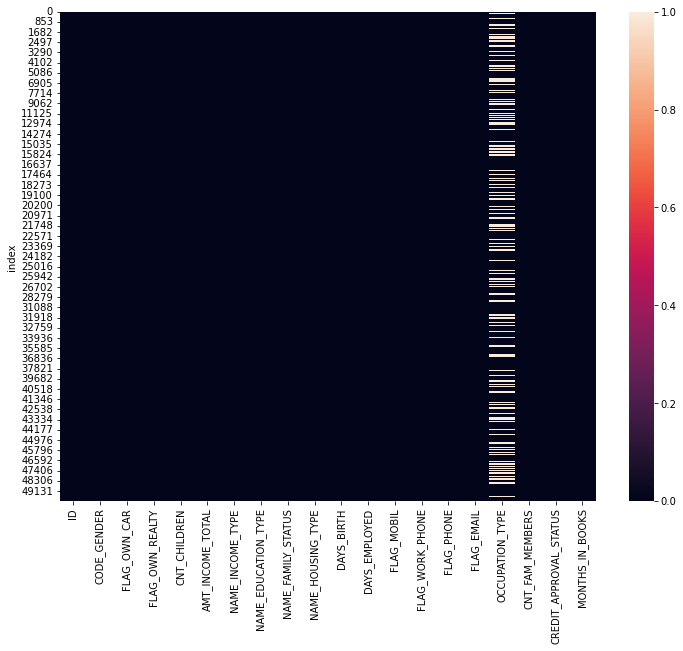

In [17]:
plt.figure(figsize=(12,9))
sns.heatmap(comp_dataset.isnull())

In [18]:
isnull_sum = comp_dataset.isnull().sum()

num_vars = comp_dataset.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]

cat_vars = comp_dataset.select_dtypes(include=["object"]).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]

print(num_vars,cat_vars)
print(num_vars_miss,cat_vars_miss)

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'CREDIT_APPROVAL_STATUS', 'MONTHS_IN_BOOKS'],
      dtype='object') Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')
[] ['OCCUPATION_TYPE']


In [19]:
comp_dataset.to_csv('comp_dataset.csv')

In [20]:
# Handling Outliers
unskewed_cols = [columns for columns in num_vars if ((comp_dataset[columns].skew())) > 1 | (comp_dataset[columns].skew()<-1)]

for columns in unskewed_cols:
    comp_dataset[columns] = np.where(comp_dataset[columns]<comp_dataset[columns].quantile(.15),comp_dataset[columns].quantile(.15),comp_dataset[columns])
    comp_dataset[columns] = np.where(comp_dataset[columns]>comp_dataset[columns].quantile(.85),comp_dataset[columns].quantile(.85),comp_dataset[columns])
comp_dataset.skew(numeric_only=True)

ID                         0.09
CNT_CHILDREN               0.83
AMT_INCOME_TOTAL           0.40
DAYS_BIRTH                 0.18
DAYS_EMPLOYED              0.39
FLAG_MOBIL                 0.00
FLAG_WORK_PHONE            1.31
FLAG_PHONE                 0.90
FLAG_EMAIL                 0.00
CNT_FAM_MEMBERS           -0.10
CREDIT_APPROVAL_STATUS   -26.95
MONTHS_IN_BOOKS            0.73
dtype: float64

In [21]:

X = comp_dataset.drop(['CREDIT_APPROVAL_STATUS'],axis='columns')
y = comp_dataset['CREDIT_APPROVAL_STATUS']

In [22]:
# Making a pipeline 
# Imputing, encoding & scaling the data
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

num_var_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="mean"))])
cat_vars_imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy="constant", fill_value='missing'))])
scaling_pipeline = Pipeline(steps=[('std_scalar',StandardScaler())])

preprocessor = ColumnTransformer(transformers=[("mean_imputer", num_var_imputer, num_vars_miss),
                               ("missing_imputer", cat_vars_imputer,cat_vars_miss)])

label_encoder = LabelEncoder()

X['OCCUPATION_TYPE'] = preprocessor.fit_transform(X)

X= X.apply(label_encoder.fit_transform)

X = scaling_pipeline.fit_transform(X)


In [23]:
corr_matrix = comp_dataset.corr()
corr_matrix['CREDIT_APPROVAL_STATUS'].sort_values(ascending=False)

CREDIT_APPROVAL_STATUS    1.00
DAYS_EMPLOYED             0.02
FLAG_WORK_PHONE           0.00
CNT_CHILDREN              0.00
CNT_FAM_MEMBERS           0.00
ID                       -0.00
DAYS_BIRTH               -0.00
AMT_INCOME_TOTAL         -0.00
FLAG_PHONE               -0.01
MONTHS_IN_BOOKS          -0.01
FLAG_MOBIL                 NaN
FLAG_EMAIL                 NaN
Name: CREDIT_APPROVAL_STATUS, dtype: float64

In [24]:
X

array([[-1.7320033 ,  1.42528309,  1.27817192, ...,  1.18819462,
        -0.12223487, -0.35756476],
       [-1.73190828,  1.42528309,  1.27817192, ...,  1.18819462,
        -0.12223487, -0.42462747],
       [-1.73181325,  1.42528309,  1.27817192, ...,  0.85339801,
        -0.12223487,  0.58131315],
       ...,
       [ 1.69836571, -0.701615  , -0.78236737, ...,  0.01640647,
        -0.12223487,  0.78250127],
       [ 1.7147094 , -0.701615  , -0.78236737, ...,  0.51860139,
        -0.12223487, -0.75994101],
       [ 1.7253518 ,  1.42528309, -0.78236737, ..., -0.48578846,
        -1.5977959 , -0.49169018]])

In [25]:
print(X.shape)

(36456, 19)


In [26]:
y = np.array(y)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
x_tl, y_tl = tl.fit_resample(X,y)
print('Original dataset shape', y_train.shape)
print('Resample dataset shape', y_tl.shape)

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_tl, y_tl)
print('Original dataset shape', y_tl.shape)
print('Resample dataset shape', y_smote.shape)

Original dataset shape (25519,)
Resample dataset shape (36437,)
Original dataset shape (36437,)
Resample dataset shape (72774,)


In [29]:
# Model selected by us
# Unsampled data is feeded
from sklearn.linear_model import LogisticRegression
Model2 = LogisticRegression()
Model2.fit(X_train, y_train)
score1 = Model2.score(X_test, y_test)
print(score1)

# Sampled data is feeded
Model22 = LogisticRegression()
Model22.fit(x_smote, y_smote)
score2 = Model22.score(X_test, y_test)
print(score2)

0.9984456432294048
0.7095181494011155


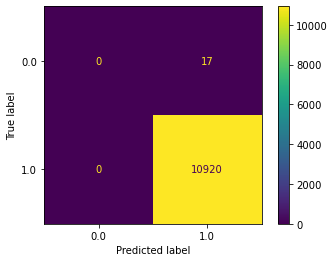

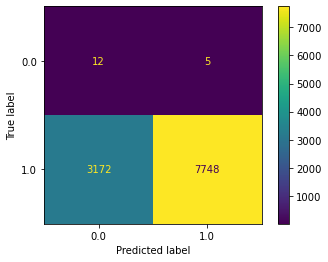

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(Model2, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(Model22, X_test, y_test)

In [31]:
# ANN developed by us.
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score

ann = tf.keras.models.Sequential()
# Input & 1st layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
# 2nd layer
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
# 3rd layer
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, batch_size = 32, epochs = 5)

Epoch 1/5
798/798 [==============================] - 3s 2ms/step - loss: 0.0709 - accuracy: 0.9987
Epoch 2/5
798/798 [==============================] - 2s 2ms/step - loss: 0.0109 - accuracy: 0.9987
Epoch 3/5
798/798 [==============================] - 2s 2ms/step - loss: 0.0100 - accuracy: 0.9987
Epoch 4/5
798/798 [==============================] - 2s 2ms/step - loss: 0.0094 - accuracy: 0.9987
Epoch 5/5
798/798 [==============================] - 2s 2ms/step - loss: 0.0090 - accuracy: 0.9987


In [32]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    0    17]
 [    0 10920]]


0.9984456432294048

In [33]:
# Sampled data is feeded
ann.fit(x_smote, y_smote, batch_size = 32, epochs = 5)
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

Epoch 1/5
2275/2275 [==============================] - 6s 2ms/step - loss: 0.2691 - accuracy: 0.8980
Epoch 2/5
2275/2275 [==============================] - 5s 2ms/step - loss: 0.1182 - accuracy: 0.9658
Epoch 3/5
2275/2275 [==============================] - 5s 2ms/step - loss: 0.0959 - accuracy: 0.9732
Epoch 4/5
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9771
Epoch 5/5
2275/2275 [==============================] - 6s 3ms/step - loss: 0.0767 - accuracy: 0.9797
[[   17     0]
 [  444 10476]]


0.9594038584621011

In [34]:
# Model as recommended by evalML - LGBMC
import lightgbm as ltb
from sklearn import metrics

Model1 = ltb.LGBMClassifier(colsample_bytree=0.6247444707207354,
               learning_rate=0.2775782165459813, max_bin=1023,
               min_child_samples=14, n_estimators=27, num_leaves=52,
               reg_alpha=0.0013689282323546977, reg_lambda=0.21368755215090374,
               verbose=-1)
Model1.fit(X_train, y_train)
score1 = Model1.score(X_test, y_test)
print(score1)

Model11 = ltb.LGBMClassifier(colsample_bytree=0.6247444707207354,
               learning_rate=0.2775782165459813, max_bin=1023,
               min_child_samples=14, n_estimators=27, num_leaves=52,
               reg_alpha=0.0013689282323546977, reg_lambda=0.21368755215090374,
               verbose=-1)
Model11.fit(x_smote, y_smote)
score2 = Model11.score(X_test, y_test)
print(score2)


0.9986285087318277
0.9994514034927311


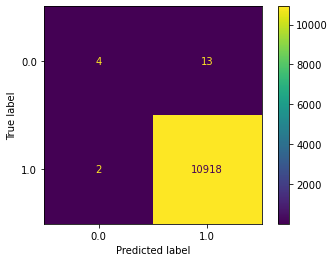

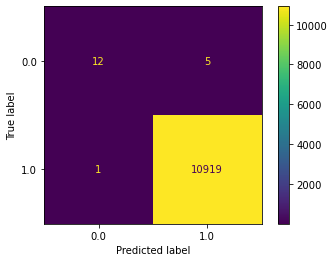

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(Model1, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(Model11, X_test, y_test)

In [36]:
#ANN Architecture as recommended by keras_tuner
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Input layer & the 1st hidden layer
classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform',activation='relu',input_dim = 19))

#2nd hidden layer
classifier.add(Dense(units = 288, kernel_initializer = 'he_uniform',activation='relu'))

#3rd hidden layer
classifier.add(Dense(units = 384, kernel_initializer = 'he_uniform',activation='relu'))

#4th hidden layer
classifier.add(Dense(units = 384, kernel_initializer = 'he_uniform',activation='relu'))

#5th hidden layer
classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform',activation='relu'))

#6th hidden layer
classifier.add(Dense(units = 354, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
1710/1710 [==============================] - 12s 6ms/step - loss: 3.3665 - accuracy: 0.9966 - val_loss: 4.7565 - val_accuracy: 0.9980
Epoch 2/10
1710/1710 [==============================] - 11s 6ms/step - loss: 0.4132 - accuracy: 0.9974 - val_loss: 0.3610 - val_accuracy: 0.9980
Epoch 3/10
1710/1710 [==============================] - 14s 8ms/step - loss: 0.9005 - accuracy: 0.9976 - val_loss: 5.6031 - val_accuracy: 0.9980
Epoch 4/10
1710/1710 [==============================] - 13s 7ms/step - loss: 0.2449 - accuracy: 0.9975 - val_loss: 0.6894 - val_accuracy: 0.9980
Epoch 5/10
1710/1710 [==============================] - 11s 6ms/step - loss: 0.3257 - accuracy: 0.9987 - val_loss: 0.0153 - val_accuracy: 0.9980
Epoch 6/10
1710/1710 [==============================] - 10s 6ms/step - loss: 0.0075 - accuracy: 0.9991 - val_loss: 0.0151 - val_accuracy: 0.9980
Epoch 7/10
1710/1710 [==============================] - 9s 5ms/step - loss: 0.0078 - accuracy: 0.9991 - val_loss: 0.0157 - val_acc

In [37]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[    0    17]
 [    0 10920]]


0.9984456432294048